In [1]:
import pandas as pd
from scipy import stats
import numpy as np

# Step 2: Load the CSV file into a pandas DataFrame
df = pd.read_csv('justPRstudies.csv')
print(len(df))

df1 = pd.read_csv('justSRstudies.csv')
df=pd.concat([df,df1])
print(len(df))
# Extract 'high_br' and 'low_br' columns
high_br = df['high_br']
low_br = df['low_br']

# Calculate means and standard errors
mean_high_br = np.mean(high_br)
mean_low_br = np.mean(low_br)

std_error_high_br = np.std(high_br, ddof=1) / np.sqrt(len(high_br))
std_error_low_br = np.std(low_br, ddof=1) / np.sqrt(len(low_br))

# Perform the t-test
t_statistic, p_value = stats.ttest_rel(high_br, low_br)

# Calculate the standard error on the test statistic T
std_error_t_statistic = np.sqrt((std_error_high_br ** 2 + std_error_low_br ** 2) / 2)

# Print out the results
print("Mean of 'high_br':", mean_high_br)
print("Standard Error of 'high_br':", std_error_high_br)

print("Mean of 'low_br':", mean_low_br)
print("Standard Error of 'low_br':", std_error_low_br)

print("T-Value:", t_statistic)
print("P-Value:", p_value)
print("Standard Error of T-Statistic:", std_error_t_statistic)

print(df)

213
307
Mean of 'high_br': 0.9087947882736156
Standard Error of 'high_br': 0.012400743466514132
Mean of 'low_br': 0.8583061889250815
Standard Error of 'low_br': 0.015333163668819068
T-Value: 2.803530828647891
P-Value: 0.00537751555531567
Standard Error of T-Statistic: 0.013944252339531976
    high_br  low_br  Difference  PR_usage  pre_map_change  post_map_change  \
0       1.0     1.0         0.0      0.50            1.00             1.00   
1       1.0     1.0         0.0      0.25            1.00             1.00   
2       1.0     1.0         0.0      0.50            1.00             1.00   
3       1.0     1.0         0.0      0.25            1.00             1.00   
4       1.0     1.0         0.0      0.75            1.00             1.00   
..      ...     ...         ...       ...             ...              ...   
89      0.5     1.0        -0.5      0.75            0.75             0.75   
90      1.0     1.0         0.0      0.50            1.00             0.50   
91      

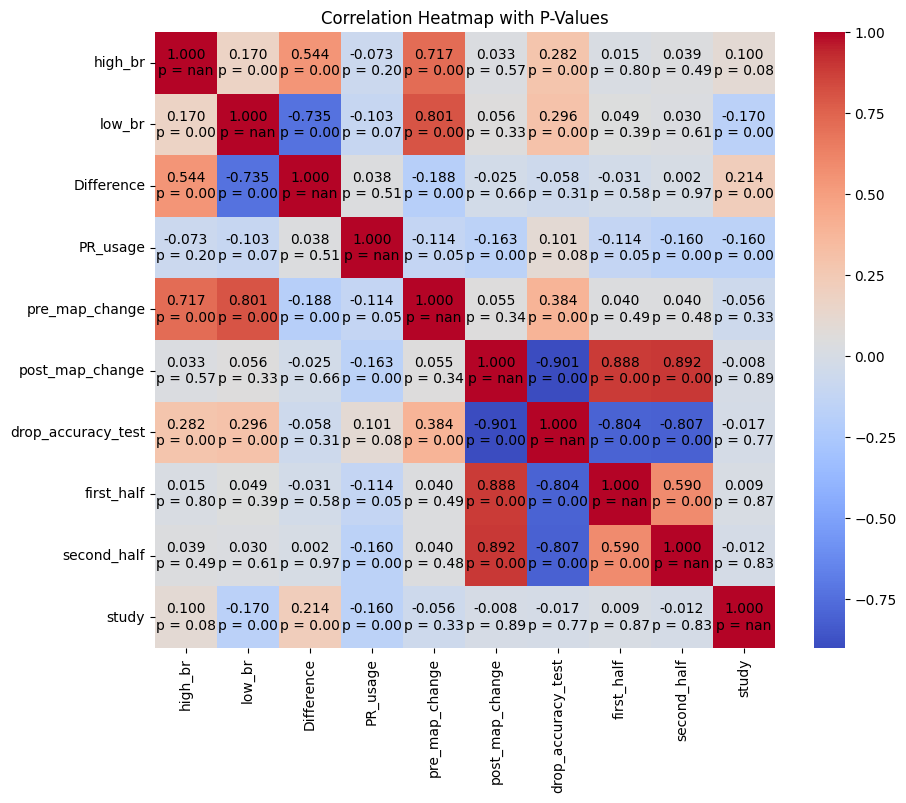

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2: Load the CSV file into a pandas DataFrame
# df = pd.read_csv('justSRstudies.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson')

# Create an empty matrix to store the p-values
p_values_matrix = pd.DataFrame(columns=correlation_matrix.columns, index=correlation_matrix.columns)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))

# Loop through the columns and calculate correlations and p-values
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation, p_value = stats.pearsonr(df[col1], df[col2])
            p_values_matrix.loc[col1, col2] = p_value

heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Loop through the cells to add correlation values and p-values as text
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        text = heatmap.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.3f}\n'
                                               f'p = {p_values_matrix.iloc[i, j]:.2f}',
                           ha='center', va='center', color='black')

plt.title('Correlation Heatmap with P-Values')
plt.show()


In [3]:
import bambi as bmb

# 4. Hierarchical regression using Bambi
model2 = bmb.Model("drop_accuracy_test ~ PR_usage+(PR_usage|study)", df)
fitted2 = model2.fit(draws=2000,target_accept=0.9999)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [drop_accuracy_test_sigma, Intercept, PR_usage, 1|study_sigma, 1|study_offset, PR_usage|study_sigma, PR_usage|study_offset]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 39 seconds.


In [4]:
import arviz as az
summary_df = az.summary(fitted2,var_names=['PR_usage'], hdi_prob=0.95)  # Exclude random effects conditioned on sub_id, consider 95% HDI
# Print the summary DataFrame
print(summary_df)

           mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
PR_usage  0.212  0.131    -0.056      0.467      0.002    0.002    3708.0   

          ess_tail  r_hat  
PR_usage    3254.0    1.0  
